# Pipeline

In [1]:
# Reload modules every time before executing the Python code typed
%load_ext autoreload
%autoreload 2

# Import from code root directory
import sys; sys.path.insert(0, '../')

# Imports
from access.amazon_doc2vec_reader import AmoreDoctovecReader
from selection.bounding_boxes import BoundingBoxes
from explanations.tfidf_explainer import TfidfExplainer
from explanations.wordcloud import Wordcloud

# Reader

In [2]:
reader = AmoreDoctovecReader()
options = {}
options['data_directory'] = '/home/eml4u/EML4U/data/amazon-complete'
options['distributions_file'] = '/tmp/amore_test_1.pickle'
reader.initialize(options)
print('Dimensions:', reader.get_dimensions())

AmoreDoctovecReader distributions file: /tmp/amore_test_1.pickle
AmoreDoctovecReader data directory:     /home/eml4u/EML4U/data/amazon-complete
AmoreDoctovecReader: Loading distribution file: /tmp/amore_test_1.pickle
AmazonPickleReader: Reading raw data
AmazonPickleReader: Reading bow50 data
Dimensions: 50


# Detector

In [3]:
bounding_boxes = BoundingBoxes()
options = {}
options['percentile'] = 0.995
options['enclosed_dimensions'] = 50
bounding_boxes.initialize(options)
bounding_boxes.set_reader(reader)
item_ids_0 = bounding_boxes.select_item_ids(reader.get_distribution_ids()[0], reader.get_distribution_ids()[1])
item_ids_1 = bounding_boxes.select_item_ids(reader.get_distribution_ids()[1], reader.get_distribution_ids()[0])
print('Items size 0:', len(item_ids_0))
print('Items size 1:', len(item_ids_1))

BoundingBoxes percentile:                            0.995
BoundingBoxes minimum number of enclosed dimensions: 50
BoundingBoxes: Collecting values of single dimensions
BoundingBoxes: Updating boundaries
BoundingBoxes: Filtering items
BoundingBoxes: Collecting values of single dimensions
BoundingBoxes: Updating boundaries
BoundingBoxes: Filtering items
Items size 0: 2310
Items size 1: 4347


# Explainer

Note: TF-IDF values of tokens in single detected documents are just summed up in the current version.

In [4]:
tfidf_explainer = TfidfExplainer()

In [5]:
token_dict = tfidf_explainer.get_token_dict(0, 1, item_ids_0, item_ids_1, reader, 50)
print(token_dict)

{'season': 68.98260026073687, 'great': 53.79601298799255, 'best': 30.79525818984337, 'series': 30.762621079974636, 'love': 28.53302483162034, 'excellent': 27.033691219411683, 'awesome': 18.45631055504917, 'amazing': 16.92986209017593, 'seasons': 16.180858857935217, 'episodes': 16.02834903016149, 'wonderful': 15.976720836299231, 'loved': 14.6191698185762, 'collection': 14.386300582155204, 'shows': 12.989078225513179, 'favorite': 12.693378630151813, 'fantastic': 12.469258190004599, 'episode': 12.033048597153474, 'perfect': 11.454942746289841, 'fun': 10.527314428379118, 'condition': 10.24686551233793, 'jane': 9.205263142349907, 'highly': 8.41972697218652, 'set': 8.058694723565978, 'wait': 7.967629025007453, 'hilarious': 7.404917715541878, 'rochester': 7.216739013533651, 'gift': 7.0817330253439135, 'outstanding': 7.080386936417672, '24': 6.794314797312565, 'rome': 6.776759825949938, 'vol': 6.714872798173371, 'band': 6.678361927402847, 'pleased': 6.6031868756570375, 'loves': 6.5884466351288

### Visual representation

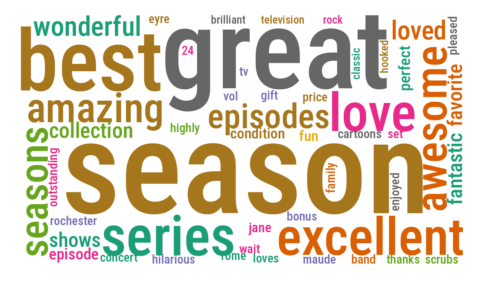

In [6]:
wordcloud = Wordcloud()
wordcloud.plot(wordcloud.get_wordcloud(token_dict))

In [7]:
token_dict = tfidf_explainer.get_token_dict(1, 0, item_ids_1, item_ids_0, reader, 50)

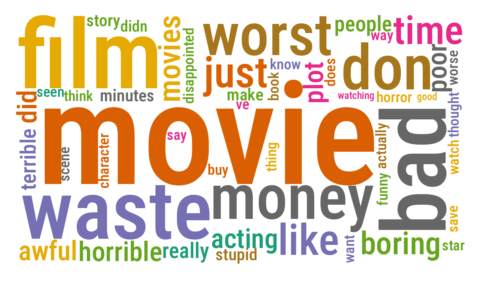

In [8]:
wordcloud = Wordcloud()
wordcloud.plot(wordcloud.get_wordcloud(token_dict))